In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_and_grad(w, X, y):
    z = X @ w
    p = sigmoid(z)
    eps = 1e-12
    loss = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
    grad = X.T @ (p - y) / X.shape[0]
    return loss, grad

def gradient_descent(X, y, iters=20, alpha0=0.1, beta=0.5, c=1e-4):
    w = np.zeros(X.shape[1])  # zero init
    losses = []
    for _ in range(iters):
        f, g = logistic_loss_and_grad(w, X, y)
        losses.append(f)
        # Backtracking line search
        d = -g
        alpha = alpha0
        while True:
            w_new = w + alpha * d
            f_new, _ = logistic_loss_and_grad(w_new, X, y)
            if f_new <= f + c * alpha * g.dot(d):
                break
            alpha *= beta
            if alpha < 1e-12:
                break
        w = w_new
    return w, losses

w_gd, losses_gd = gradient_descent(X, y, iters=20)
print("Final weights:", w_gd)
print("Final loss:", losses_gd[-1])


Final weights: [0.54242023 0.66422518]
Final loss: 0.04986263956980091


In [10]:
def hessian(w, X):
    z = X @ w
    p = sigmoid(z)
    R = p * (1 - p)
    XR = X * R[:, None]
    return X.T @ XR / X.shape[0]

def newton_method(X, y, iters=20, damping=1e-6):
    w = np.zeros(X.shape[1])  # zero init
    losses = []
    for _ in range(iters):
        f, g = logistic_loss_and_grad(w, X, y)
        losses.append(f)
        H = hessian(w, X)
        H_damped = H + damping * np.eye(H.shape[0])
        try:
            d = np.linalg.solve(H_damped, -g)
        except np.linalg.LinAlgError:
            d = -g
        w = w + d
    return w, losses

# Run Newton’s method
w_newton, losses_newton = newton_method(X, y, iters=20)
print("Final weights:", w_newton)
print("Final loss:", losses_newton[-1])


Final weights: [8.6681287  2.95697561]
Final loss: 2.4264828381449564e-07


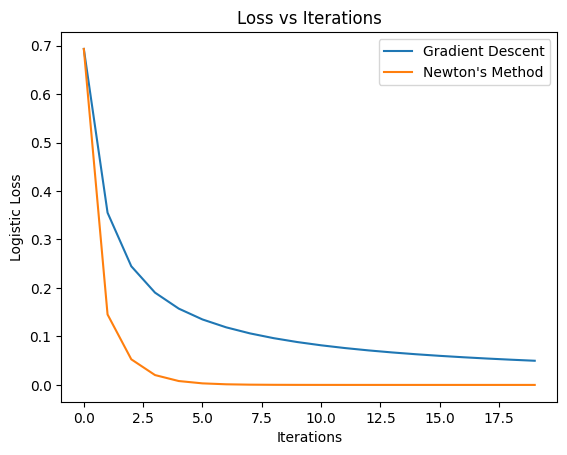

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses_gd)), losses_gd, label='Gradient Descent')
plt.plot(range(len(losses_newton)), losses_newton, label='Newton\'s Method')
plt.xlabel("Iterations")
plt.ylabel("Logistic Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.show()


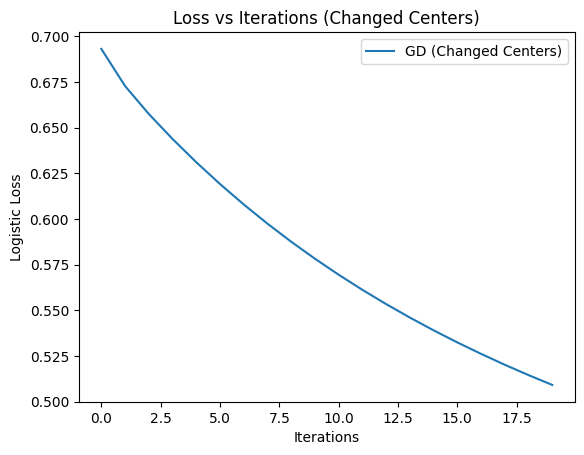

Final weights (changed centers): [-0.10140345  0.59327223 -0.03440351]
Final loss: 0.5091106082459033


In [12]:
# New centers
centers2 = [[2, 2], [5, 1.5]]
X2, y2 = make_blobs(n_samples=2000, centers=centers2, random_state=5)
X2 = np.dot(X2, transformation)
X2 = np.hstack([np.ones((X2.shape[0], 1)), X2])

# Run GD on new dataset
w_gd2, losses_gd2 = gradient_descent(X2, y2, iters=20)

plt.plot(range(len(losses_gd2)), losses_gd2, label='GD (Changed Centers)')
plt.xlabel("Iterations")
plt.ylabel("Logistic Loss")
plt.title("Loss vs Iterations (Changed Centers)")
plt.legend()
plt.show()

print("Final weights (changed centers):", w_gd2)
print("Final loss:", losses_gd2[-1])
